# Simetric test

Time: 	24.00 hours
Sample interval (days): 	2.0 / 20
Mass: 	65256.64

Time: 	48.00 hours
Sample interval (days): 	3.0 / 20
Mass: 	65256.64

Time: 	72.00 hours
Sample interval (days): 	4.0 / 20
Mass: 	65256.63

Time: 	96.00 hours
Sample interval (days): 	5.0 / 20
Mass: 	65216.48

Time: 	120.00 hours
Sample interval (days): 	6.0 / 20
Mass: 	65305.82

Time: 	144.00 hours
Sample interval (days): 	7.0 / 20
Mass: 	65214.92

Time: 	168.00 hours
Sample interval (days): 	8.0 / 20
Mass: 	65199.15

Time: 	192.00 hours
Sample interval (days): 	9.0 / 20
Mass: 	64971.94

Time: 	216.00 hours
Sample interval (days): 	10.0 / 20
Mass: 	65067.77

Time: 	240.00 hours
Sample interval (days): 	11.0 / 20
Mass: 	64882.51

Time: 	264.00 hours
Sample interval (days): 	12.0 / 20
Mass: 	64987.46

Time: 	288.00 hours
Sample interval (days): 	13.0 / 20
Mass: 	64971.33

Time: 	312.00 hours
Sample interval (days): 	14.0 / 20
Mass: 	64829.28

Time: 	336.00 hours
Sample interval (days): 	15.0 / 20
Mass: 	65008.85

Time

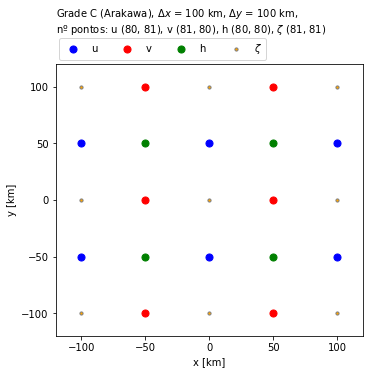

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio
%matplotlib inline
from functions import *
import os 

# Run SWE model 
# -------------------------
days = 20
scen= 'scen3'
test, param = lf_swe(scen, amp=0, days=days, tstep=24)

# Unpack-dictionary
# -----------------
dx, dy, Xh, Yh, Xu, Yu, Xv, Yv, Xz, Yz, H, Fh, Fu = param.values()
t_lst, h_lst, u_lst, v_lst, div_lst, vor_lst, mass, en_p, en_k, enst = test.values()

# Plot C-grid
# -----------
fig, ax = plt.subplots(1, figsize=(5.5,5), gridspec_kw={'hspace':0.05})
ax.scatter(Xu/1000, Yu/1000, color='blue', marker='.', s=200,label='u', edgecolors='b')
ax.scatter(Xv/1000, Yv/1000, color='red' , marker='.', s=200,label='v', edgecolors='r')
ax.scatter(Xh/1000, Yh/1000, color='green', marker='.', s=200,label='h', edgecolors='g')
ax.scatter(Xz/1000, Yz/1000, color='orange', marker='.', s=40, label='$\zeta$', edgecolors='0.5')
ax.set_xlabel('x [km]',fontsize=10)
ax.set_ylabel('y [km]',fontsize=10)
ax.legend(ncol=4, bbox_to_anchor=(0.7, 1.115), fontsize=10)
ax.set_xlim(-120, 120)
ax.set_ylim(-120, 120)
ax.set_title("Grade C (Arakawa), $\Delta x$ = {:.0f} km, $\Delta y$ = {:.0f} km,\nnº pontos: u ".format(dx/1000, dy/1000)+ f"{Xu.shape}, v {Xv.shape}, h {Xh.shape}, $\zeta$ {Xz.shape}\n\n", 
                fontsize= 10, loc='left')
fig.savefig("fig/GridC_ex5.png", dpi=300, bbox_inches='tight', facecolor='w')


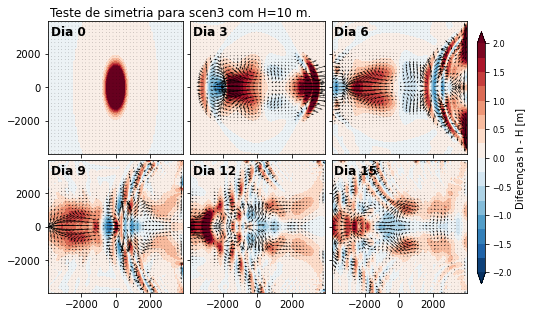

In [41]:
# Plot hu, hv time evolution
# --------------------------
staged_u = np.zeros(Xh.shape)
staged_v = np.zeros(Xh.shape)
pts =2
arr3 = 0.003

fig, axes = plt.subplots(2,3, figsize=(7.5,5), sharex = True, sharey=True, 
                         gridspec_kw={'hspace':0.05, 'wspace':0.05} )
for ax, npass in zip(axes.flatten(), range(0, 21, 3)):
    npass = int(npass)
    im = ax.contourf(Xh/1000, Yh/1000, h_lst[npass]-H, levels=np.linspace(-2,2,17),
                     extend='both', cmap=plt.cm.RdBu_r)
    ax.set_title("Dia {:.0f}".format(t_lst[npass]/(3600*24)), y =1, x =0.02, pad=-14, loc="left", fontweight='bold')
    
    u, v = u_lst[npass], v_lst[npass]
    staged_u[ :, :] = (u[ :, 1:] + u[ :, :-1]) * 0.5
    staged_v[ :, :] = (v[ 1:, :] + v[:-1, : ]) * 0.5
    
    Q = ax.quiver(Xh[::pts, ::pts]/1000, Yh[::pts, ::pts]/1000,
                  staged_u[::pts, ::pts], staged_v[::pts, ::pts],
                  units = "xy", scale = arr3, width = 30)
    #fig.colorbar(im, ax=ax)
# cax = fig.add_axes([.2,.07,0.6,.02]) # left, bottom, width, height (horizontal)
fig.suptitle(f'Teste de simetria para {scen} com H={H} m.', y=.92, x=.37)
cax = fig.add_axes([.92,.15,0.015,.7]) # left, bottom, width, height (horizontal)
cbar = fig.colorbar(im, cax=cax, orientation='vertical') # pad, shrink
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_ylabel('Diferenças h - H [m]')
fig.savefig("fig/lf_ex5_"+str(H)+"m_"+scen+"_Fh.png", dpi = 300, bbox_inches='tight', facecolor='w')

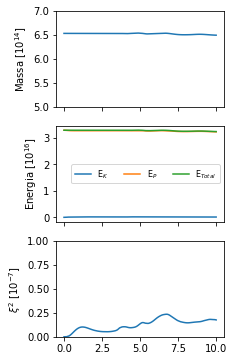

In [6]:
# Mass, energy and enstrophy
# --------------------------
fig, ax = plt.subplots(3, 1, figsize=(3, 6), sharex=True,
                         gridspec_kw={'wspace':0.25})

t_dias = (np.arange(0, 10*24*3600, 60))[:-1]/(3600*24)
ax[0].plot(t_dias, mass/1e14, label='Massa')
ax[0].set_ylabel('Massa [10$^{14}]$')
ax[0].set_ylim(5,7)

ax[1].plot(t_dias, en_k/1e16, label='E$_K$')
ax[1].plot(t_dias, en_p/1e16, label='E$_P$')
ax[1].plot(t_dias, (en_k+en_p)/1e16, label='E$_{Total}$')
ax[1].set_ylabel('Energia [10$^{16}]$')
#ax[1].set_ylim(0,10)
ax[1].legend(fontsize=8, ncol=3)

ax[2].plot(t_dias, enst/1e-7, label='E$_K$')
ax[2].set_ylabel('$\\xi ^2$ [10$^{-7}]$')
ax[2].set_ylim(0,1)

fig.savefig("fig/lf_ex5_vol_ener_Fh"+str(H)+"m.png", dpi = 300, bbox_inches='tight', facecolor='w')

# Oceanographic case

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio
%matplotlib inline
from functions import *
import os 

# Run SWE model 
# -------------------------
days = 100
test, param = lf_swe(amp=1, days=days, tstep=24)

# Unpack-dictionary
# -----------------
dx, dy, Xh, Yh, Xu, Yu, Xv, Yv, Xz, Yz, H, Fh, Fu = param.values()
t_lst, h_lst, u_lst, v_lst, div_lst, vor_lst, mass, en_p, en_k, enst = test.values()

Time: 	24.00 hours
Sample interval (days): 	2.0 / 100
Mass: 	65256.64

Time: 	48.00 hours
Sample interval (days): 	3.0 / 100
Mass: 	65256.64

Time: 	72.00 hours
Sample interval (days): 	4.0 / 100
Mass: 	65256.63

Time: 	96.00 hours
Sample interval (days): 	5.0 / 100
Mass: 	65216.64

Time: 	120.00 hours
Sample interval (days): 	6.0 / 100
Mass: 	65305.78

Time: 	144.00 hours
Sample interval (days): 	7.0 / 100
Mass: 	65207.44

Time: 	168.00 hours
Sample interval (days): 	8.0 / 100
Mass: 	65135.56

Time: 	192.00 hours
Sample interval (days): 	9.0 / 100
Mass: 	64891.17

Time: 	216.00 hours
Sample interval (days): 	10.0 / 100
Mass: 	64983.93

Time: 	240.00 hours
Sample interval (days): 	11.0 / 100
Mass: 	64800.80

Time: 	264.00 hours
Sample interval (days): 	12.0 / 100
Mass: 	64874.09

Time: 	288.00 hours
Sample interval (days): 	13.0 / 100
Mass: 	64859.07

Time: 	312.00 hours
Sample interval (days): 	14.0 / 100
Mass: 	64705.05

Time: 	336.00 hours
Sample interval (days): 	15.0 / 100
Mass: 	

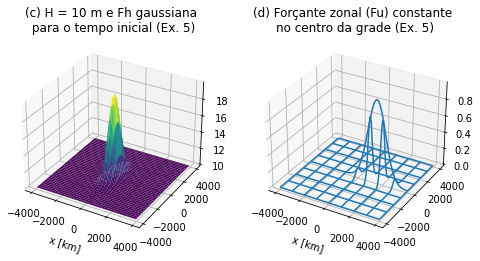

In [7]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
surf = ax.plot_surface(Xh/1000, Yh/1000, Fh+H, cmap='viridis', edgecolor='none')
# ax.set_zlim(249, 260)
ax.set_xlabel('x [km]')
ax.set_title(f'(c) H = {H} m e Fh gaussiana\n para o tempo inicial (Ex. 5)')

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.plot_wireframe(Xu/1000, Yu/1000, Fu*86400, rstride=10, cstride=10)
ax.set_title('(d) Forçante zonal (Fu) constante \nno centro da grade (Ex. 5)')
ax.set_xlabel('x [km]')
plt.show()
fig.savefig("fig/fonte_ex5.png", dpi=300, bbox_inches='tight', facecolor='w')

## Time evolution

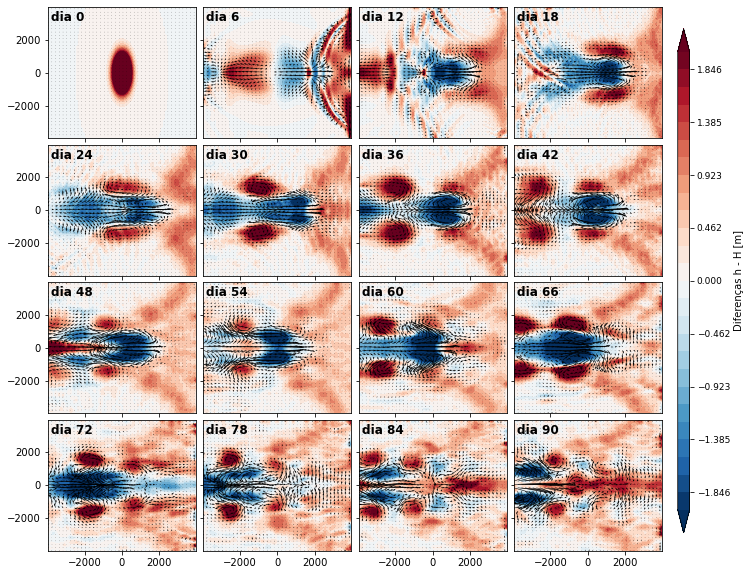

In [11]:
staged_u = np.zeros(Xh.shape)
staged_v = np.zeros(Xh.shape)
pts =2
arr3 = 0.005
scen = 'scen3'

fig, axes = plt.subplots(4,4, figsize=(11,10), sharex = True, sharey=True, 
                         gridspec_kw={'hspace':0.05, 'wspace':0.05} )
for ax, npass in zip(axes.flatten(), range(0, 100, 6)):
    npass = int(npass)
    im = ax.contourf(Xh/1000, Yh/1000, h_lst[npass]-H, levels=np.linspace(-2,2,27),
                     extend='both', cmap=plt.cm.RdBu_r)
    ax.set_title("dia {:.0f}".format(t_lst[npass]/(3600*24)), y =1, x =0.02, pad=-14, loc="left", fontweight='bold')
    
    u, v = u_lst[npass], v_lst[npass]
    staged_u[ :, :] = (u[ :, 1:] + u[ :, :-1]) * 0.5
    staged_v[ :, :] = (v[ 1:, :] + v[:-1, : ]) * 0.5
    
    Q = ax.quiver(Xh[::pts, ::pts]/1000, Yh[::pts, ::pts]/1000,
                  staged_u[::pts, ::pts], staged_v[::pts, ::pts],
                  units = "xy", scale = arr3, width = 30)
    #fig.colorbar(im, ax=ax)
# cax = fig.add_axes([.2,.07,0.6,.02]) # left, bottom, width, height (horizontal)
cax = fig.add_axes([.92,.15,0.015,.7]) # left, bottom, width, height (horizontal)
cbar = fig.colorbar(im, cax=cax, orientation='vertical') # pad, shrink
cbar.ax.tick_params(labelsize=9)
cbar.ax.set_ylabel('Diferenças h - H [m]')
fig.savefig("fig/lf_ex5_"+str(H)+"m_"+scen+"_Fu.png", dpi = 300, bbox_inches='tight', facecolor='w')

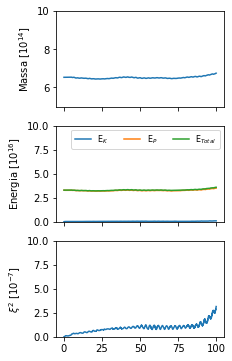

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(3, 6), sharex=True,
                         gridspec_kw={'wspace':0.25})
t_dias = np.arange(0, days*24*3600, 60)[1:]/(24*60*60)
ax[0].plot(t_dias, mass/1e14, label='Massa')
ax[0].set_ylabel('Massa [10$^{14}]$')
ax[0].set_ylim(5,10)

ax[1].plot(t_dias, en_k/1e16, label='E$_K$')
ax[1].plot(t_dias, en_p/1e16, label='E$_P$')
ax[1].plot(t_dias, (en_k+en_p)/1e16, label='E$_{Total}$')
ax[1].set_ylabel('Energia [10$^{16}]$')
ax[1].set_ylim(0,10)
ax[1].legend(fontsize=8, ncol=3)

ax[2].plot(t_dias, enst/1e-7, label='E$_K$')
ax[2].set_ylabel('$\\xi ^2$ [10$^{-7}]$')
ax[2].set_ylim(0,10)

fig.savefig("fig/lf_ex5_vol_ener_Fhu"+str(H)+"m.png", dpi = 300, bbox_inches='tight', facecolor='w')

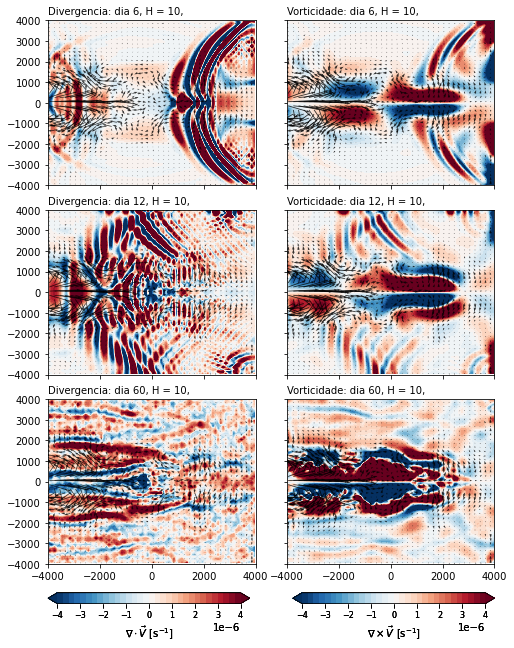

In [43]:
# Divergence & Vorticity
# ----------------------
lvs1 = list(np.linspace(-4e-6, 4e-6, 2*16+1))
lvs2 = list(np.linspace(-4e-6, 4e-6, 2*16+1))
title = 'Beta equatorial'
scen = 'scen3'
nidx = [6, 12, 60]
pts=2
arr3 = 0.006
    
fig, axes = plt.subplots(3,2, figsize=(8,10), sharex=True, sharey=True, gridspec_kw={'wspace':0.15, 'hspace':0.15} )
# Divergencia
# -----------
for n, ax in zip(nidx, [axes[0,0], axes[1,0], axes[2,0]] ):
    im = ax.contourf(Xh/1000,Yh/1000, div_lst[n], levels=lvs1, cmap=plt.cm.RdBu_r, extend='both') #,
    #cbar = fig.colorbar(im, ax=ax, orientation="vertical")
    u, v = u_lst[npass], v_lst[npass]
    staged_u[ :, :] = (u[ :, 1:] + u[ :, :-1]) * 0.5
    staged_v[ :, :] = (v[ 1:, :] + v[:-1, : ]) * 0.5
    
    Q = ax.quiver(Xh[::pts, ::pts]/1000, Yh[::pts, ::pts]/1000,
                  staged_u[::pts, ::pts], staged_v[::pts, ::pts],
                  units = "xy", scale = arr3, width = 30, color='k', alpha=.8)
    #qk = ax.quiverkey(Q, 0.9, 0.8, 1000, "0.1 m/s", labelpos = "E", coordinates = "figure")
    ax.set_xlim(-4000, 4000)
    ax.set_ylim(-4000, 4000)
    ax.set_title("Divergencia: dia {:.0f}, H = {:.0f}, ".format(t_lst[n]/(3600*24),  H), fontsize=10, loc='left')
    cax = fig.add_axes([.125,.07,0.35,.015]) # left, bottom, width, height
    cbar = fig.colorbar(im, cax=cax, orientation='horizontal') # pad, shrink
    cbar.ax.tick_params(labelsize=8)
    cbar.ax.set_xlabel('$\\nabla \\cdot \\vec{V}$'+' [s$^{-1}$]')
    
# Vorticidade
# -----------
for n, ax in zip(nidx, [axes[0,1], axes[1,1], axes[2,1]]):
    im = ax.contourf(Xh/1000,Yh/1000, vor_lst[n], levels=lvs2, cmap=plt.cm.RdBu_r,  extend='both') #levels=lvs,
    #cbar = fig.colorbar(im, ax=ax, orientation="vertical")
    Q = ax.quiver(Xh[::pts, ::pts]/1000, Yh[::pts, ::pts]/1000, 
                  staged_u[::pts, ::pts], staged_v[::pts, ::pts],
                  units = "xy", scale = arr3, width = 35, color='k', alpha=.8)
    #qk = ax.quiverkey(Q, 0.9, 0.8, 1000, "0.1 m/s", labelpos = "E", coordinates = "figure")
    ax.set_xlim(-4000, 4000)
    ax.set_ylim(-4000, 4000)
    ax.set_title("Vorticidade: dia {:.0f}, H = {:.0f}, ".format(t_lst[n]/(3600*24),  H), fontsize=10, loc='left')
    cax = fig.add_axes([.55,.07,0.35,.015]) # left, bottom, width, height
    cbar = fig.colorbar(im, cax=cax, orientation='horizontal') # pad, shrink
    cbar.ax.tick_params(labelsize=8)
    cbar.ax.set_xlabel('$\\nabla \\times \\vec{V}$'+' [s$^{-1}$]')

fig.savefig("fig/lf_ex5_div_vor"+str(H)+"m_"+scen+".png", dpi = 300, bbox_inches='tight', facecolor='w')

## Animation

In [4]:
lvs1 = list(np.linspace(-1, 1, 16*2+1))
lvs2 = list(np.linspace(-1, 1, 16*2+1))
lvs3 = list(np.linspace(-1, 1, 16*2+1))
lvs = {'scen1': lvs1, 'scen2':lvs2, 'scen3':lvs3}
scen = 'scen3'
arr3 = 0.005 # arrows size
pts = 4
staged_u = np.zeros(Xh.shape)
staged_v = np.zeros(Xh.shape)

filenames = []

for n in range(0, len(h_lst)):
    fig, ax = plt.subplots()


    arrows = {'scen1': 0.001, 'scen2':0.001, 'scen3':0.001}
    im = ax.contourf(Xh/1000, Yh/1000, h_lst[int(n)]-H, 
                    cmap = plt.cm.RdBu_r, 
                    levels = lvs[scen], extend='both')
        
    cbar = fig.colorbar(im, ax=ax, orientation="vertical")
    cbar.ax.set_ylabel('h - H [m]', fontsize=8)
    ax.set_title("t={:.0f} dias".format(t_lst[int(n)]/(24*3600)),  
                 fontsize=10, loc='left')
    ax.set_xlim(-4000, 4000)
    ax.set_ylim(-4000, 4000)

    u, v = u_lst[n], v_lst[n]
    staged_u[ :, :] = (u[ :, 1:] + u[ :, :-1]) * 0.5
    staged_v[ :, :] = (v[ 1:, :] + v[:-1, : ]) * 0.5
    
    Q = ax.quiver(Xh[::pts, ::pts]/1000, Yh[::pts, ::pts]/1000,
                  staged_u[::pts, ::pts], staged_v[::pts, ::pts],
                  units = "xy", scale = arr3, width = 30)

    # create file name and append it to a list
    filename = f'fig/gifs/{n}.png'
    filenames.append(filename)
    plt.close() # build gif

    # save frame
    fig.savefig(filename, dpi=200)

    ngif = 'gifs/lf_ex5_'+str(H)+'m_'+scen+'_Fu.gif'

    with imageio.get_writer(ngif, mode='I', duration = .4) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
         
# Remove files
for filename in set(filenames):
    os.remove(filename) 
print(f"Execution of animation done for {scen}.")

Execution of animation done for scen3.
